
Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."


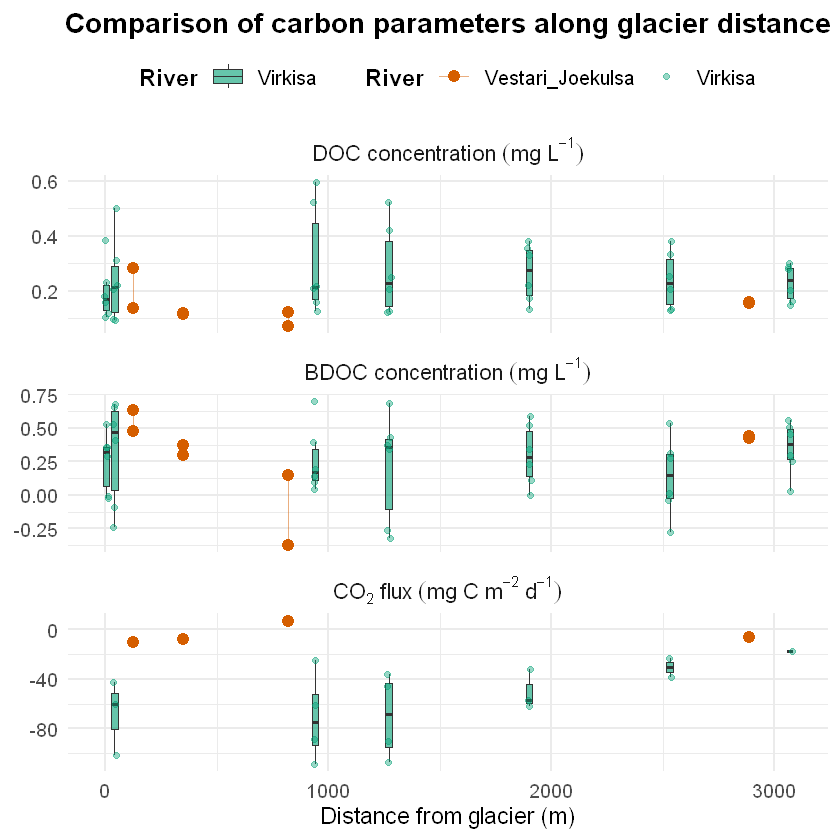

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readxl)

# Daten einlesen
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx", 
                 sheet = "FINAL_final_final")

# ----------------------------
facet_titles <- c(
  "average_DOC_sample" = "DOC",
  "BDOC_pct" = "BDOC",
  "CO2_Flux" = "CO2 flux"
)

y_labels <- c(
  "DOC" = "DOC~concentration~(mg~L^{-1})",
  "BDOC" = "BDOC~concentration~(mg~L^{-1})",
  "CO2 flux" = "CO[2]~flux~(mg~C~m^{-2}~d^{-1})"
)

# ✅ HIER Farben ändern
river_colors <- c("Virkisa" = "#009E73",           # grün
                  "Vestari_Joekulsa" = "#D55E00") # rot
# ----------------------------

prepare_long_df <- function(data) {
  data %>%
    pivot_longer(cols = c(average_DOC_sample, CO2_Flux, BDOC_pct),
                 names_to = "Parameter", values_to = "Value") %>%
    mutate(
      Value = ifelse(Parameter == "BDOC_pct", Value / 100, Value),
      Parameter = facet_titles[Parameter]
    )
}

df_long <- prepare_long_df(df)

df_vestari_raw <- df_long %>%
  filter(river_name == "Vestari_Joekulsa", site_nr <= 4)

df_virkisa_raw <- df_long %>%
  filter(river_name == "Virkisa", site_nr != 8)

df_combined <- bind_rows(df_vestari_raw, df_virkisa_raw) %>%
  mutate(
    Parameter_facet = factor(Parameter, levels = c("DOC", "BDOC", "CO2 flux"))
  )

df_combined$river_name <- factor(df_combined$river_name,
                                 levels = c("Virkisa", "Vestari_Joekulsa"))

df_vestari <- df_combined %>% filter(river_name == "Vestari_Joekulsa")
df_virkisa <- df_combined %>% filter(river_name == "Virkisa")

plot <- ggplot() +
  geom_line(data = df_vestari,
            aes(x = distance_from_glacier, y = Value,
                group = interaction(site_nr, Parameter),
                color = river_name),
            alpha = 0.5) +
  geom_point(data = df_vestari,
             aes(x = distance_from_glacier, y = Value, color = river_name),
             size = 3) +
  geom_boxplot(data = df_virkisa,
               aes(x = distance_from_glacier, y = Value,
                   group = site_nr, fill = river_name),
               alpha = 0.6, width = 30, outlier.shape = NA) +
  geom_jitter(data = df_virkisa,
              aes(x = distance_from_glacier, y = Value, color = river_name),
              width = 10, alpha = 0.4, size = 1.5) +
  facet_wrap(~Parameter_facet, scales = "free_y", ncol = 1,
             labeller = as_labeller(y_labels, label_parsed)) +
  scale_color_manual(values = river_colors, name = "River") +
  scale_fill_manual(values = river_colors, name = "River") +
  labs(
    title = "Comparison of carbon parameters along glacier distance",
    x = "Distance from glacier (m)", y = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    strip.text = element_text(face = "bold", size = 13),
    plot.title = element_text(hjust = 0.5, face = "bold", lineheight = 1.2),
    legend.position = "top",
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 12),
    legend.key.width = unit(0.8, "cm"),
    legend.spacing.x = unit(0.5, "cm")
  )

# 👉 In Jupyter anzeigen
print(plot)

# 👉 Speichern
ggsave("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Grouping_fluesse/Plot_Combined_Virkisa_Vestari.png",
       plot = plot, width = 15, height = 22, units = "cm", dpi = 300)


`summarise()` has grouped output by 'site_nr', 'site_label'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_nr', 'site_label'. You can override using the `.groups` argument.
Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 25 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 25 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."


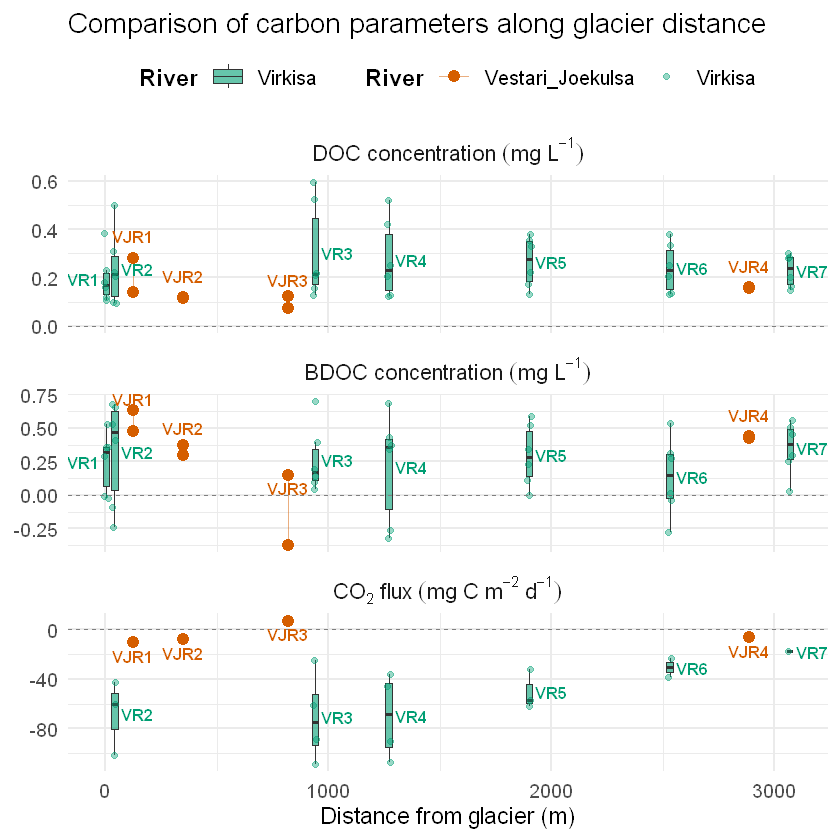

In [18]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readxl)

# Daten einlesen
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx", 
                 sheet = "FINAL_final_final")

facet_titles <- c(
  "average_DOC_sample" = "DOC",
  "BDOC_pct" = "BDOC",
  "CO2_Flux" = "CO2 flux"
)

y_labels <- c(
  "DOC" = "DOC~concentration~(mg~L^{-1})",
  "BDOC" = "BDOC~concentration~(mg~L^{-1})",
  "CO2 flux" = "CO[2]~flux~(mg~C~m^{-2}~d^{-1})"
)

river_colors <- c("Virkisa" = "#009E73", "Vestari_Joekulsa" = "#D55E00")

prepare_long_df <- function(data) {
  data %>%
    pivot_longer(cols = c(average_DOC_sample, CO2_Flux, BDOC_pct),
                 names_to = "Parameter", values_to = "Value") %>%
    mutate(
      Value = ifelse(Parameter == "BDOC_pct", Value / 100, Value),
      Parameter = facet_titles[Parameter]
    )
}

df_long <- prepare_long_df(df)

df_vestari_raw <- df_long %>%
  filter(river_name == "Vestari_Joekulsa", site_nr <= 4)

df_virkisa_raw <- df_long %>%
  filter(river_name == "Virkisa", site_nr != 8)

df_combined <- bind_rows(df_vestari_raw, df_virkisa_raw) %>%
  mutate(
    Parameter_facet = factor(Parameter, levels = c("DOC", "BDOC", "CO2 flux"))
  )

# Site-Bezeichnungen
df_combined <- df_combined %>%
  mutate(
    site_label = case_when(
      river_name == "Virkisa" ~ paste0("VR", site_nr),
      river_name == "Vestari_Joekulsa" ~ paste0("VJR", site_nr),
      TRUE ~ as.character(site_nr)
    )
  )

df_combined$river_name <- factor(df_combined$river_name,
                                 levels = c("Virkisa", "Vestari_Joekulsa"))

df_vestari <- df_combined %>% filter(river_name == "Vestari_Joekulsa")
df_virkisa <- df_combined %>% filter(river_name == "Virkisa")

# Label-Positionen Vestari
label_df_vestari <- df_vestari %>%
  group_by(site_nr, site_label, Parameter_facet) %>%
  summarise(
    distance_from_glacier = mean(distance_from_glacier, na.rm = TRUE),
    Value = mean(Value, na.rm = TRUE),
    river_name = first(river_name)
  ) %>%
  ungroup() %>%
  mutate(
    vjust_val = case_when(
      Parameter_facet == "CO2 flux" ~ 1.5,
      site_label == "VJR1" & Parameter_facet == "DOC" ~ -2.5,  # 👉 noch höher über Punkt
      site_label %in% c("VJR1", "VJR2") & Parameter_facet %in% c("DOC", "BDOC") ~ -1.2,
      TRUE ~ -1.2
    )
  )

# Label-Positionen Virkisa
label_df_virkisa <- df_virkisa %>%
  group_by(site_nr, site_label, Parameter_facet) %>%
  summarise(
    distance_from_glacier = mean(distance_from_glacier, na.rm = TRUE),
    Value = mean(Value, na.rm = TRUE),
    river_name = first(river_name)
  ) %>%
  ungroup() %>%
  mutate(
    hjust_val = case_when(
      site_label == "VR1" & Parameter_facet %in% c("DOC", "BDOC") ~ 1.2,   # VR1 links
      site_label == "VR2" & Parameter_facet %in% c("DOC", "BDOC") ~ -0.2,  # VR2 rechts
      TRUE ~ -0.2
    )
  )

plot <- ggplot() +
  geom_line(data = df_vestari,
            aes(x = distance_from_glacier, y = Value,
                group = interaction(site_nr, Parameter),
                color = river_name),
            alpha = 0.5) +
  geom_point(data = df_vestari,
             aes(x = distance_from_glacier, y = Value, color = river_name),
             size = 3) +
  geom_boxplot(data = df_virkisa,
               aes(x = distance_from_glacier, y = Value,
                   group = site_nr, fill = river_name),
               alpha = 0.6, width = 30, outlier.shape = NA) +
  geom_jitter(data = df_virkisa,
              aes(x = distance_from_glacier, y = Value, color = river_name),
              width = 10, alpha = 0.4, size = 1.5) +
  # Horizontale 0-Linie
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  # Vestari Labels
  geom_text(data = label_df_vestari,
            aes(x = distance_from_glacier, y = Value, label = site_label, color = river_name, vjust = vjust_val),
            fontface = "bold", size = 3.5, show.legend = FALSE) +
  # Virkisa Labels
  geom_text(data = label_df_virkisa,
            aes(x = distance_from_glacier, y = Value, label = site_label, color = river_name, hjust = hjust_val),
            fontface = "bold", size = 3.5, show.legend = FALSE) +
  facet_wrap(~Parameter_facet, scales = "free_y", ncol = 1,
             labeller = as_labeller(y_labels, label_parsed)) +
  scale_color_manual(values = river_colors, name = "River") +
  scale_fill_manual(values = river_colors, name = "River") +
  labs(
    title = "Comparison of carbon parameters along glacier distance",
    x = "Distance from glacier (m)", y = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    strip.text = element_text(face = "bold", size = 13),
    legend.position = "top",
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 12),
    legend.key.width = unit(0.8, "cm"),
    legend.spacing.x = unit(0.5, "cm")
  )

# Anzeige
print(plot)


# Plot anpassen, damit Labels nicht abgeschnitten werden
plot <- plot + coord_cartesian(clip = "off")

# Speichern, mit limitsize = FALSE
ggsave("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Grouping_fluesse/Plot_Combined_Virkisa_Vestari_final.png",
       plot = plot,
       width = 15,
       height = 18,
       units = "cm",
       dpi = 300,
       limitsize = FALSE)



>> Verwende Datei 'Sophia_Data.xls', Sheet 'FINAL_final_final'

Warning message:
"Removed 86 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 86 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 86 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 86 rows containing missing values or values outside the scale range (`geom_point()`)."


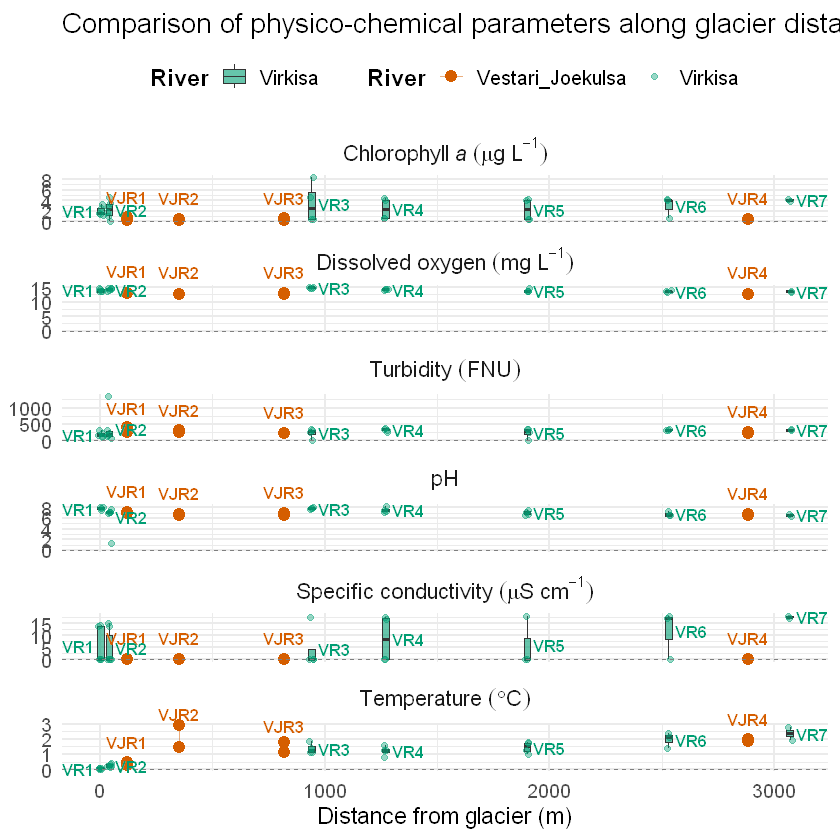

In [13]:
# ---- Pakete ----
suppressPackageStartupMessages({
  library(readxl); library(dplyr); library(tidyr); library(ggplot2); library(readr)
})

# ---- Pfade ----
in_xlsx <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Sophia_Data.xls"
in_xls  <- "/mnt/data/Sophia_Data.xls"   # Upload
out_png <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Grouping_fluesse/Plot_Combined_Virkisa_Vestari_physchem.png"

# ---- Zielspalten ----
targets <- c("Chlorophyll_ugperL","ODO_mgperL","Turbidity_FNU","pH","SpCond_uSpercm_korr","Temp_C")

# ---- Helper ----
clean_num <- function(x){
  if (is.numeric(x)) return(x)
  x <- gsub(",", ".", as.character(x))                          # Komma -> Punkt
  x <- gsub("(?i)nd|n\\.?d\\.?|na|n/?a", "", x, perl=TRUE)      # n.d., ND, NA
  x <- gsub("[<>≈~]", "", x)                                    # Vergleichszeichen
  readr::parse_number(x, locale = readr::locale(decimal_mark=".", grouping_mark=""))
}

trim_names <- function(d) { names(d) <- trimws(names(d)); d }

read_with_targets <- function(path){
  sh <- readxl::excel_sheets(path)
  for (s in sh){
    df <- suppressMessages(readxl::read_excel(path, sheet = s)) |> trim_names()
    if (all(c("river_name","site_nr","distance_from_glacier") %in% names(df)) &&
        all(targets %in% names(df))) {
      message(sprintf(">> Verwende Datei '%s', Sheet '%s'", basename(path), s))
      return(df)
    }
  }
  stop("Kein Sheet mit allen Zielspalten gefunden in: ", path)
}

# ---- Datei laden (xlsx bevorzugt, sonst /mnt/data xls) ----
df <- tryCatch(read_with_targets(in_xlsx),
               error = function(e) read_with_targets(in_xls))

# ---- Numerik bereinigen ----
df <- df %>% mutate(across(all_of(targets), clean_num))

# ---- Long-Format ----
facet_titles <- c(
  "Chlorophyll_ugperL"  = "Chl-a",
  "ODO_mgperL"          = "DO",
  "Turbidity_FNU"       = "Turbidity",
  "pH"                  = "pH",
  "SpCond_uSpercm_korr" = "SpCond",
  "Temp_C"              = "Temp"
)
facet_order <- c("Chl-a","DO","Turbidity","pH","SpCond","Temp")
y_labels <- c(
  "Chl-a"     = "Chlorophyll~italic(a)~(mu*g~L^{-1})",
  "DO"        = "Dissolved~oxygen~(mg~L^{-1})",
  "Turbidity" = "Turbidity~(FNU)",
  "pH"        = "pH",
  "SpCond"    = "Specific~conductivity~(mu*S~cm^{-1})",
  "Temp"      = "Temperature~(degree*C)"
)

df_long <- df %>%
  pivot_longer(cols = all_of(targets), names_to = "Parameter_raw", values_to = "Value") %>%
  mutate(Parameter = facet_titles[Parameter_raw])

# ---- Auswahl & Labels ----
df_combined <- df_long %>%
  filter((river_name == "Virkisa" & site_nr != 8) |
         (river_name == "Vestari_Joekulsa" & site_nr <= 4)) %>%
  mutate(
    Parameter_facet = factor(Parameter, levels = facet_order),
    river_name = factor(river_name, levels = c("Virkisa","Vestari_Joekulsa")),
    site_label = case_when(
      river_name == "Virkisa" ~ paste0("VR", site_nr),
      river_name == "Vestari_Joekulsa" ~ paste0("VJR", site_nr),
      TRUE ~ as.character(site_nr)
    )
  )

df_vestari <- df_combined %>% filter(river_name == "Vestari_Joekulsa")
df_virkisa <- df_combined %>% filter(river_name == "Virkisa")

label_df_vestari <- df_vestari %>%
  group_by(site_nr, site_label, Parameter_facet) %>%
  summarise(distance_from_glacier = mean(distance_from_glacier, na.rm=TRUE),
            Value = mean(Value, na.rm=TRUE),
            river_name = first(river_name), .groups="drop") %>%
  mutate(vjust_val = -1.2)

label_df_virkisa <- df_virkisa %>%
  group_by(site_nr, site_label, Parameter_facet) %>%
  summarise(distance_from_glacier = mean(distance_from_glacier, na.rm=TRUE),
            Value = mean(Value, na.rm=TRUE),
            river_name = first(river_name), .groups="drop") %>%
  mutate(hjust_val = case_when(site_label=="VR1" ~ 1.2,
                               site_label=="VR2" ~ -0.2,
                               TRUE ~ -0.2))

# ---- Plot ----
river_colors <- c("Virkisa"="#009E73", "Vestari_Joekulsa"="#D55E00")

p <- ggplot() +
  geom_line(data=df_vestari,
            aes(distance_from_glacier, Value,
                group=interaction(site_nr, Parameter_facet),
                color=river_name), alpha=0.5) +
  geom_point(data=df_vestari,
             aes(distance_from_glacier, Value, color=river_name), size=3) +
  geom_boxplot(data=df_virkisa,
               aes(distance_from_glacier, Value, group=site_nr, fill=river_name),
               alpha=0.6, width=30, outlier.shape=NA) +
  geom_jitter(data=df_virkisa,
              aes(distance_from_glacier, Value, color=river_name),
              width=10, alpha=0.4, size=1.5) +
  geom_hline(yintercept=0, linetype="dashed", color="grey50", linewidth=0.3) +
  geom_text(data=label_df_vestari,
            aes(distance_from_glacier, Value, label=site_label,
                color=river_name, vjust=vjust_val),
            fontface="bold", size=3.5, show.legend=FALSE) +
  geom_text(data=label_df_virkisa,
            aes(distance_from_glacier, Value, label=site_label,
                color=river_name, hjust=hjust_val),
            fontface="bold", size=3.5, show.legend=FALSE) +
  facet_wrap(~Parameter_facet, scales="free_y", ncol=1,
             labeller=as_labeller(y_labels, label_parsed)) +
  scale_color_manual(values=river_colors, name="River") +
  scale_fill_manual(values=river_colors, name="River") +
  labs(title="Comparison of physico-chemical parameters along glacier distance",
       x="Distance from glacier (m)", y=NULL) +
  theme_minimal(base_size=14) +
  theme(strip.text=element_text(face="bold", size=13),
        legend.position="top",
        legend.title=element_text(face="bold"),
        legend.text=element_text(size=12)) +
  coord_cartesian(clip="off")

print(p)

# ---- Speichern (DIN A4 hochkant) ----
ggsave(out_png, plot=p, width=15, height=22, units="cm", dpi=300, limitsize=FALSE)


Warning message:
"Removed 86 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 86 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 86 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 86 rows containing missing values or values outside the scale range (`geom_point()`)."


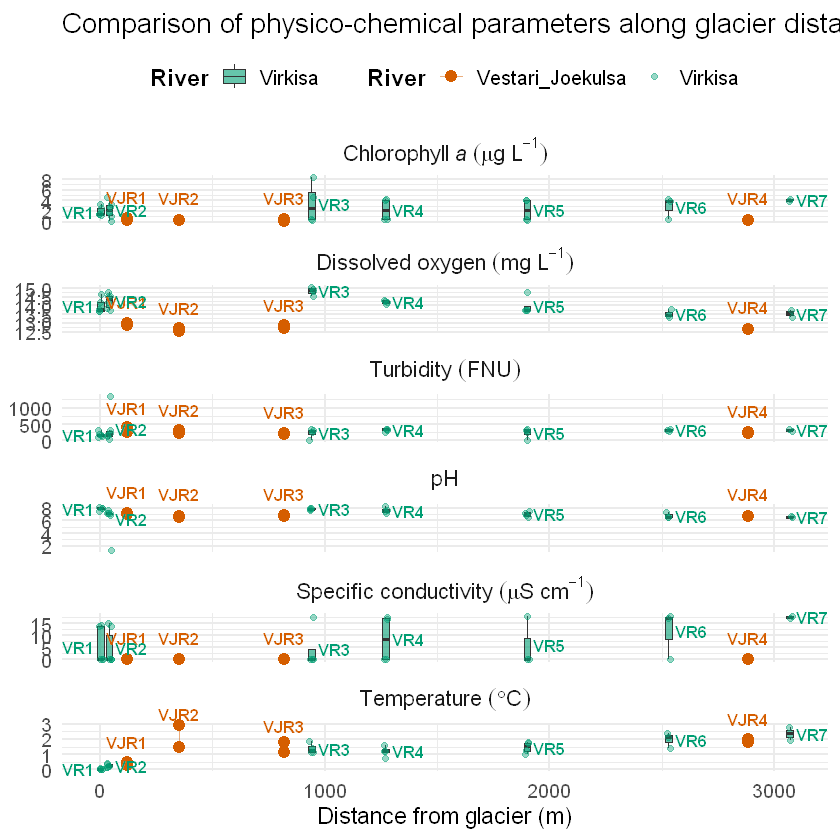

In [15]:
# ---- Plot ----
river_colors <- c("Virkisa"="#009E73", "Vestari_Joekulsa"="#D55E00")

p <- ggplot() +
  geom_line(data=df_vestari,
            aes(distance_from_glacier, Value,
                group=interaction(site_nr, Parameter_facet),
                color=river_name), alpha=0.5) +
  geom_point(data=df_vestari,
             aes(distance_from_glacier, Value, color=river_name), size=3) +
  geom_boxplot(data=df_virkisa,
               aes(distance_from_glacier, Value, group=site_nr, fill=river_name),
               alpha=0.6, width=30, outlier.shape=NA) +
  geom_jitter(data=df_virkisa,
              aes(distance_from_glacier, Value, color=river_name),
              width=10, alpha=0.4, size=1.5) +
  # ❌ Nulllinie entfernt
  geom_text(data=label_df_vestari,
            aes(distance_from_glacier, Value, label=site_label,
                color=river_name, vjust=vjust_val),
            fontface="bold", size=3.5, show.legend=FALSE) +
  geom_text(data=label_df_virkisa,
            aes(distance_from_glacier, Value, label=site_label,
                color=river_name, hjust=hjust_val),
            fontface="bold", size=3.5, show.legend=FALSE) +
  facet_wrap(~Parameter_facet, scales="free_y", ncol=1,
             labeller=as_labeller(y_labels, label_parsed)) +
  scale_color_manual(values=river_colors, name="River") +
  scale_fill_manual(values=river_colors, name="River") +
  labs(title="Comparison of physico-chemical parameters along glacier distance",
       x="Distance from glacier (m)", y=NULL) +
  theme_minimal(base_size=14) +
  theme(strip.text=element_text(face="bold", size=13),
        legend.position="top",
        legend.title=element_text(face="bold"),
        legend.text=element_text(size=12)) +
  coord_cartesian(clip="off")

print(p)

# ---- Speichern ----
ggsave(out_png, plot=p, width=15, height=22, units="cm", dpi=300, limitsize=FALSE)
